In [55]:
from noodles import (schedule, run_parallel, gather)
import time
import numpy as np
import sys


@schedule
def delay(dt):
    time.sleep(dt)
    return dt


def measure(f, *args):
    start = time.time()
    ret = f(*args)
    end = time.time()
    return (ret, (end - start))


def constant_time(dt, n, n_threads=8):
    wf = schedule(sum)(
            gather(*(delay(dt) for i in range(n))))

    return measure(run_parallel, wf, n_threads)


def null_delay(dt):
    time.sleep(dt)
    return dt


def constant_null(dt, n):
    return measure(lambda: sum([null_delay(dt) for i in range (n)]))


def variable_time(dt, n, n_threads=8):
    pass


def experiment(test, n):
    print("running {} with n = {}".format(test.__name__, n), file=sys.stderr)
    data = np.array([test(1/n, 1000) for i in range(25)])
    mean = data.mean(axis=0)
    std = data.std(axis=0)
    return (1/n, n, mean[0], mean[1], std[1])

In [62]:
result = np.array([experiment(constant_time, n) for n in [2**k for k in range(6, 18)]])
null_test = np.array([experiment(constant_null, n) for n in [2**k for k in range(6, 18)]])

running constant_null with n = 64
running constant_null with n = 128
running constant_null with n = 256
running constant_null with n = 512
running constant_null with n = 1024
running constant_null with n = 2048
running constant_null with n = 4096
running constant_null with n = 8192
running constant_null with n = 16384
running constant_null with n = 32768
running constant_null with n = 65536
running constant_null with n = 131072


In [4]:
import matplotlib.pyplot as plt

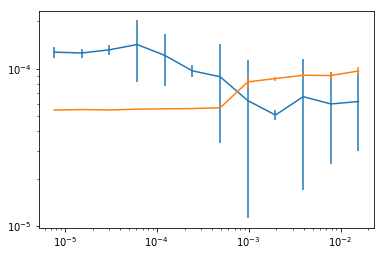

In [63]:
fig, ax = plt.subplots()
ax.set_xscale('log')
ax.set_yscale('log')
ax.errorbar(result[:,0], (result[:,3] - result[:,2]/8)/1000., yerr=result[:,4]/1000.)
ax.errorbar(null_test[:,0], (null_test[:,3] - null_test[:,2])/1000., yerr=null_test[:,4]/1000.)
plt.show()